In [21]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [22]:
# Read in the CSV and display the first 5 rows of the DataFrame
df = pd.read_csv('/Users/ivanvargas/Documents/AI_Bootcamp/travel_reviews/tripadvisor_review.csv')
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [23]:
# Rename the columns
df = df.rename(
    columns={
        'Category 1': 'Art Galleries',
        'Category 2': 'Dance Clubs',
        'Category 3': 'Juice Bars',
        'Category 4': 'Restaurants',
        'Category 5': 'Museums',
        'Category 6': 'Resorts',
        'Category 7': 'Parks',
        'Category 8': 'Beaches',
        'Category 9': 'Theaters',
        'Category 10': 'Places of Worship',})
df

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [24]:
# Create cleaned csv file
df.to_csv('cleaned_tripadvisor_review.csv', index=False)

In [25]:
# Show the datatypes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User ID            980 non-null    object 
 1   Art Galleries      980 non-null    float64
 2   Dance Clubs        980 non-null    float64
 3   Juice Bars         980 non-null    float64
 4   Restaurants        980 non-null    float64
 5   Museums            980 non-null    float64
 6   Resorts            980 non-null    float64
 7   Parks              980 non-null    float64
 8   Beaches            980 non-null    float64
 9   Theaters           980 non-null    float64
 10  Places of Worship  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [26]:
# Drop the User ID column and display new DataFrame
df_review = df.drop(columns='User ID')
df_review

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [27]:
# Scale the data using the StandardScaler and display the scaled data
scaled_data = StandardScaler().fit_transform(df_review)
scaled_data

array([[ 0.11264465,  0.93588703,  1.6197497 , ..., -0.32787224,
         0.68751758, -1.18059095],
       [ 0.38808847,  1.77264397,  2.08917107, ..., -1.49205628,
         0.797274  , -1.49190812],
       [ 1.00018585, -1.15600533, -0.60048651, ..., -0.25511074,
        -0.71187679, -0.93153721],
       ...,
       [-0.86671115, -0.06822131, -0.43555468, ..., -0.18234924,
        -0.62955947,  0.68731207],
       [ 0.11264465, -2.41114075, -1.12065614, ...,  1.05459631,
        -1.23321978, -1.05606408],
       [ 0.11264465, -1.6580595 ,  0.14805027, ...,  0.25421978,
        -0.62955947, -1.24285439]])

In [28]:
# Create a new DataFrame with the scaled data and display the new DataFrame
df_scaled_data = pd.DataFrame(scaled_data, columns=df_review.columns)
df_scaled_data

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010
...,...,...,...,...,...,...,...,...,...,...
975,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683
976,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414
977,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312
978,0.112645,-2.411141,-1.120656,-0.366610,-1.463232,-2.675687,-0.120041,1.054596,-1.233220,-1.056064


In [29]:
# Add the User ID column back to the scaled data DataFrame and set the User ID column as the index
df_scaled_data['User ID'] = df['User ID']
df_scaled_data = df_scaled_data.set_index('User ID')
df_scaled_data

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship
User ID,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010
...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312


In [30]:
# Create an empty list for inertia and define k to represent a range of clusters from 1 to 14
k = list(range(1,15))
inertia = []
# Loop through each i value for k
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_scaled_data)
    inertia.append(k_model.inertia_)

# Create and display a DataFrame representing the inertia for each cluster
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,9800.000000
1,2,7770.043196
2,3,7129.284126
3,4,6703.269768
4,5,6300.349265
5,6,5714.972928
6,7,5381.930580
7,8,5062.348551
8,9,4918.582692
9,10,4835.183478


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

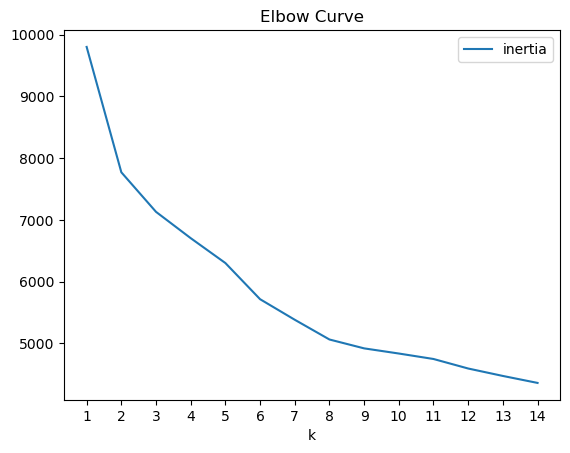

In [31]:
# Plot the elbow curve
df_elbow.plot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve', 
    xticks=k
)

In [32]:
# Perform KMeans clustering with 6 clusters
model = KMeans(n_clusters=6, random_state=1, n_init='auto')

In [33]:
# Fit the data
model.fit(df_scaled_data)

KMeans(n_clusters=6, random_state=1)

In [34]:
# Predict cluster assignments
model_predictions = model.fit_predict(df_scaled_data)
model_predictions

array([4, 4, 3, 5, 0, 2, 2, 2, 0, 5, 0, 2, 4, 4, 4, 0, 3, 4, 0, 4, 0, 2,
       2, 2, 0, 4, 4, 0, 2, 4, 4, 4, 0, 5, 5, 5, 3, 5, 4, 3, 2, 2, 3, 5,
       5, 2, 5, 3, 3, 4, 2, 3, 0, 3, 2, 2, 4, 3, 4, 0, 4, 3, 3, 5, 5, 3,
       3, 3, 3, 3, 3, 4, 5, 3, 4, 0, 2, 4, 2, 3, 2, 5, 1, 3, 5, 2, 3, 2,
       1, 3, 2, 3, 4, 4, 0, 3, 4, 3, 4, 5, 5, 5, 0, 3, 2, 4, 5, 2, 2, 0,
       5, 3, 0, 5, 4, 5, 4, 5, 3, 3, 0, 5, 0, 0, 0, 3, 3, 3, 2, 3, 3, 0,
       0, 0, 2, 5, 4, 0, 3, 2, 2, 3, 2, 5, 5, 2, 0, 4, 5, 0, 5, 3, 3, 3,
       3, 2, 5, 2, 0, 3, 3, 2, 0, 3, 3, 3, 4, 5, 4, 5, 5, 3, 3, 2, 3, 0,
       5, 5, 5, 5, 5, 0, 0, 3, 4, 5, 0, 2, 4, 2, 4, 4, 2, 2, 5, 2, 3, 4,
       2, 1, 4, 5, 4, 5, 3, 3, 3, 5, 3, 2, 2, 4, 3, 3, 2, 0, 2, 3, 0, 0,
       5, 3, 4, 2, 4, 2, 1, 3, 2, 4, 5, 4, 3, 3, 0, 5, 0, 5, 0, 2, 4, 0,
       5, 5, 2, 3, 3, 1, 2, 5, 0, 5, 4, 4, 3, 2, 2, 1, 3, 0, 5, 5, 5, 5,
       2, 0, 4, 0, 3, 0, 2, 3, 4, 4, 1, 2, 0, 5, 3, 5, 3, 5, 4, 0, 2, 3,
       1, 5, 2, 2, 4, 2, 3, 5, 2, 3, 3, 3, 4, 5, 2,

In [35]:
# Make a copy of the scaled DataFrame
df_scaled_data_predictions = df_scaled_data.copy()

In [36]:
# Add cluster labels
df_scaled_data_predictions['customer_cluster'] = model_predictions
df_scaled_data_predictions

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship,customer_cluster
User ID,,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,4
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,4
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,3
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,5
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,0
...,...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683,2
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414,3
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312,2


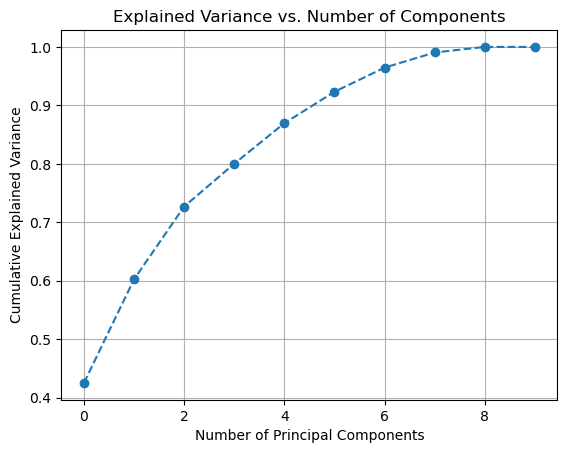

In [37]:
# Perform PCA on the review dataset and plot the cumulative explained variance to determine how many principal components are needed to capture most of the variance in the data
pca = PCA()
pca.fit(df_review)

# Plot the cumulative sum of explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

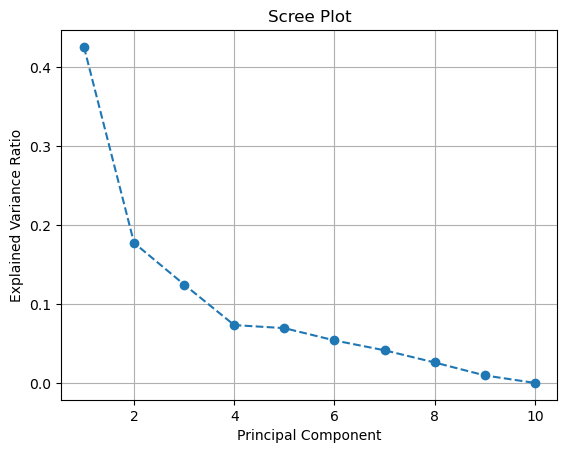

In [38]:
# Create a scree plot to visualize the explained variance ratio of each principal component
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [39]:
# Apply PCA with 4 components to the scaled dataset and transform the data into the new principal component space
pca = PCA(n_components=4)
pca_data = pca.fit_transform(df_scaled_data)
pca_data[:5]

array([[ 2.40757283, -0.07303858, -0.18536018,  0.16240024],
       [ 5.31123728, -0.02250014, -0.6548359 , -0.03498239],
       [-0.80783928, -1.7769507 ,  0.85066052,  0.75059747],
       [-1.06534598,  0.85640099, -0.95865391,  0.12635461],
       [ 0.98724627, -0.07677672, -0.73867921, -0.84994666]])

In [40]:
# Convert the PCA-transformed data into a DataFrame
df_pca_data = pd.DataFrame(
    pca_data,
    columns=['PCA1', 'PCA2', 'PCA3', 'PCA4']
)

df_pca_data['User ID'] = df_scaled_data.index
df_pca_data = df_pca_data.set_index('User ID')
df_pca_data

,PCA1,PCA2,PCA3,PCA4
User ID,,,,
User 1,2.407573,-0.073039,-0.185360,0.162400
User 2,5.311237,-0.022500,-0.654836,-0.034982
User 3,-0.807839,-1.776951,0.850661,0.750597
User 4,-1.065346,0.856401,-0.958654,0.126355
User 5,0.987246,-0.076777,-0.738679,-0.849947
...,...,...,...,...
User 976,-2.135609,-0.786899,-0.808940,-0.207218
User 977,-0.495717,-1.335973,0.811851,-0.159024
User 978,-1.064439,0.458641,-0.778467,-0.698539


In [41]:
# Create an empty list for inertia and define k to represent a range of clusters from 1 to 14
k = list(range(1,15))
inertia = []

# Loop through each i value for k for the PCA DataFrame
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_pca_data)
    inertia.append(k_model.inertia_)

# Create and display a DataFrame representing the inertia for each cluster
pca_elbow_data = {'k': k, 'inertia': inertia}
df_pca_elbow = pd.DataFrame(pca_elbow_data)
df_pca_elbow


,k,inertia
0,1,6407.110710
1,2,4389.968649
2,3,3781.934591
3,4,3224.990880
4,5,2787.071150
5,6,2515.976930
6,7,2355.788878
7,8,2155.997347
8,9,2025.317599
9,10,1924.358546


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

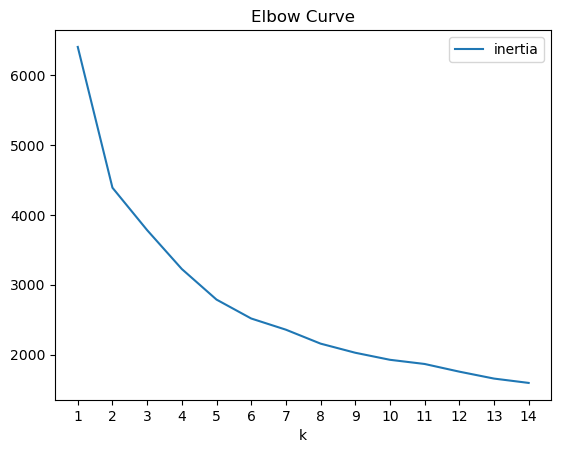

In [42]:
# Plot the elbow curve
df_pca_elbow.plot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve', 
    xticks=k
)

In [43]:
# Perform KMeans clustering with 5 clusters
pca_model = KMeans(n_clusters=5, random_state=1, n_init='auto')

In [44]:
# Fit the data
pca_model.fit(df_pca_data)

KMeans(n_clusters=5, random_state=1)

In [45]:
# Predict cluster assignments
pca_model_predictions = pca_model.fit_predict(df_pca_data)
pca_model_predictions

array([3, 3, 4, 1, 3, 1, 1, 1, 3, 2, 2, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 1,
       1, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 4, 1, 1, 1, 2,
       2, 4, 2, 1, 1, 3, 1, 1, 2, 4, 1, 1, 3, 1, 3, 3, 3, 4, 1, 1, 4, 4,
       1, 1, 1, 1, 4, 3, 2, 1, 3, 3, 4, 3, 1, 1, 4, 2, 0, 4, 4, 1, 4, 1,
       0, 2, 4, 1, 3, 3, 3, 4, 3, 4, 3, 2, 2, 1, 3, 1, 4, 3, 2, 1, 4, 2,
       2, 1, 2, 2, 3, 2, 3, 2, 1, 1, 3, 2, 3, 4, 3, 1, 1, 3, 1, 1, 1, 3,
       2, 3, 1, 2, 3, 3, 1, 1, 2, 1, 1, 2, 2, 1, 3, 3, 2, 3, 2, 1, 1, 1,
       1, 2, 2, 4, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 2, 2, 4, 1, 1, 1, 2,
       2, 4, 2, 1, 2, 3, 3, 4, 3, 2, 2, 4, 3, 1, 3, 3, 4, 1, 2, 1, 1, 3,
       1, 0, 3, 2, 3, 2, 4, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3,
       2, 4, 3, 1, 3, 1, 0, 1, 1, 3, 2, 3, 1, 1, 2, 2, 4, 2, 3, 4, 3, 3,
       2, 1, 1, 1, 4, 0, 1, 2, 3, 1, 3, 3, 1, 2, 1, 0, 4, 3, 3, 2, 4, 2,
       1, 3, 3, 2, 1, 3, 1, 1, 3, 3, 0, 1, 3, 2, 1, 4, 4, 2, 3, 3, 1, 1,
       0, 2, 1, 1, 3, 1, 1, 2, 1, 4, 1, 1, 4, 2, 1,

In [46]:
# Make a copy of the scaled PCA DataFrame
df_pca_data_predictions = df_pca_data.copy()

In [47]:
# Add cluster labels to PCA DataFrame
df_pca_data_predictions['customer_cluster'] = pca_model_predictions
df_pca_data_predictions

,PCA1,PCA2,PCA3,PCA4,customer_cluster
User ID,,,,,
User 1,2.407573,-0.073039,-0.185360,0.162400,3
User 2,5.311237,-0.022500,-0.654836,-0.034982,3
User 3,-0.807839,-1.776951,0.850661,0.750597,4
User 4,-1.065346,0.856401,-0.958654,0.126355,1
User 5,0.987246,-0.076777,-0.738679,-0.849947,3
...,...,...,...,...,...
User 976,-2.135609,-0.786899,-0.808940,-0.207218,1
User 977,-0.495717,-1.335973,0.811851,-0.159024,4
User 978,-1.064439,0.458641,-0.778467,-0.698539,1


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

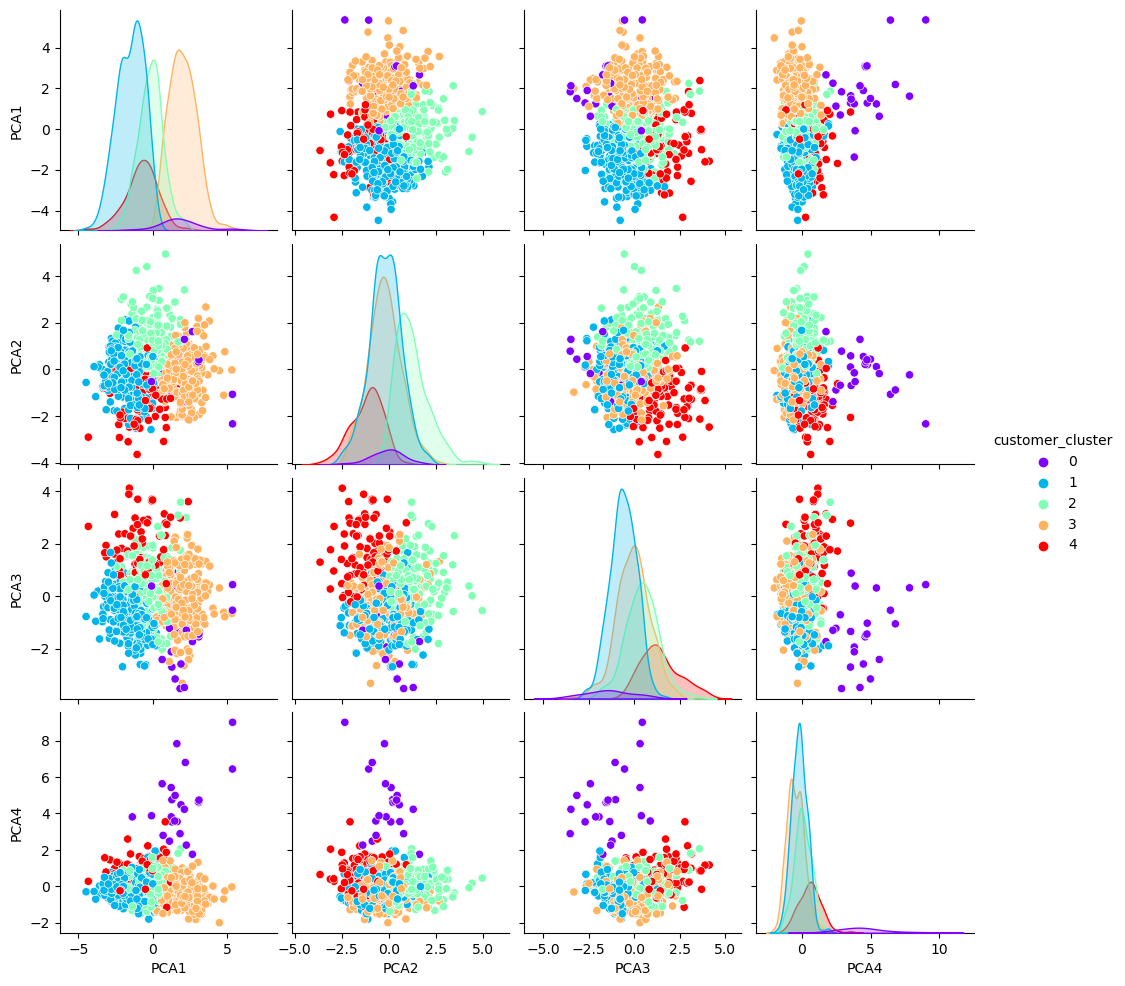

In [48]:
# Create a pair plot to visualize the relationships between the first 4 principal components and how they are distributed across the customer clusters
sns.pairplot(df_pca_data_predictions, hue="customer_cluster", palette='rainbow', vars=['PCA1', 'PCA2', 'PCA3', 'PCA4'])
plt.show()

In [49]:
# Set the User ID as the index
df = df.set_index('User ID')
df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship
User ID,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


In [50]:
# Add cluster labels to cleaned DataFrame
df['customer_cluster'] = df_pca_data_predictions['customer_cluster']
df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship,customer_cluster
User ID,,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,3
User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,3
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,4
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,3
...,...,...,...,...,...,...,...,...,...,...,...
User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,1
User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,4
User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,1


In [51]:
# Create a copy of the original DataFrame to perform optimizations
df_optimized = df.copy()
df_optimized

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship,customer_cluster
User ID,,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,3
User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,3
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,4
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,3
...,...,...,...,...,...,...,...,...,...,...,...
User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,1
User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,4
User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,1


In [52]:
# Calculate the mean values of all features for each customer cluster
cluster_summary = df_optimized.groupby('customer_cluster').mean()
cluster_summary

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Places of Worship
customer_cluster,,,,,,,,,,
0,1.062083,2.020000,0.683750,1.935833,1.028333,1.975833,3.182083,2.717500,1.539167,2.510000
1,0.792793,1.395556,0.578018,0.416637,0.707928,1.441321,3.175225,2.804324,1.443453,3.050420
2,0.800318,1.348545,0.626500,0.526955,1.028273,2.007909,3.179864,2.938227,1.884455,2.815545
3,0.852708,1.444583,1.908681,0.559688,1.241042,2.246597,3.188819,2.791667,1.528542,2.515139
4,1.427739,0.866435,0.840174,0.517652,0.668522,1.651304,3.179565,2.859913,1.440348,2.812435


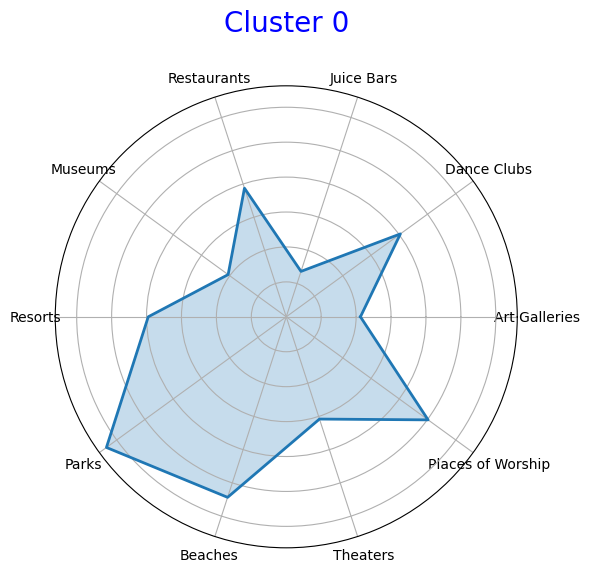

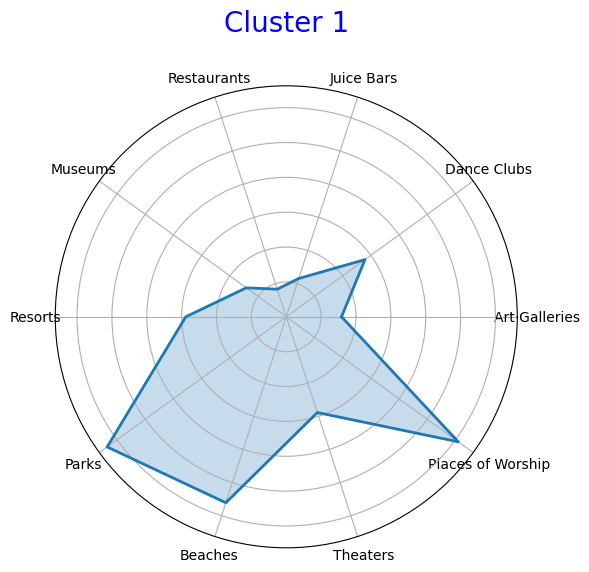

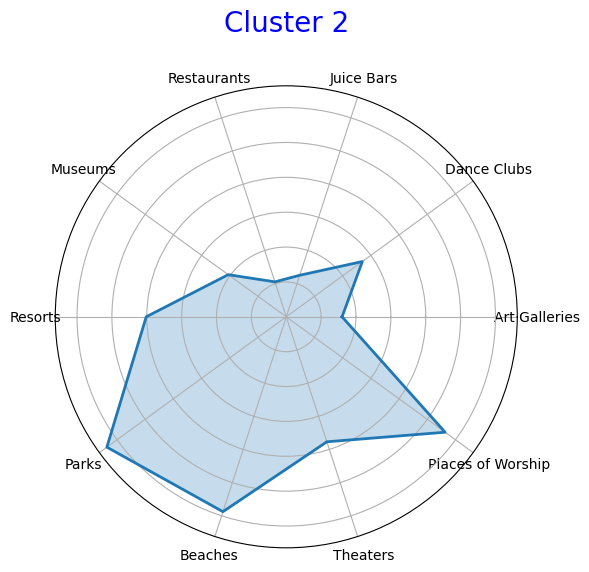

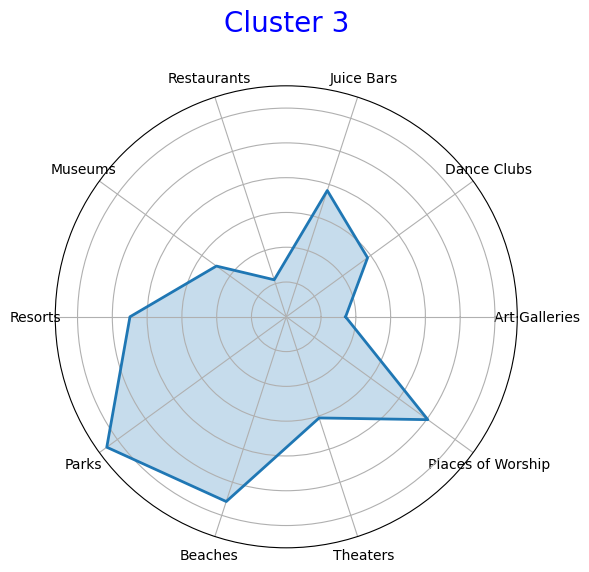

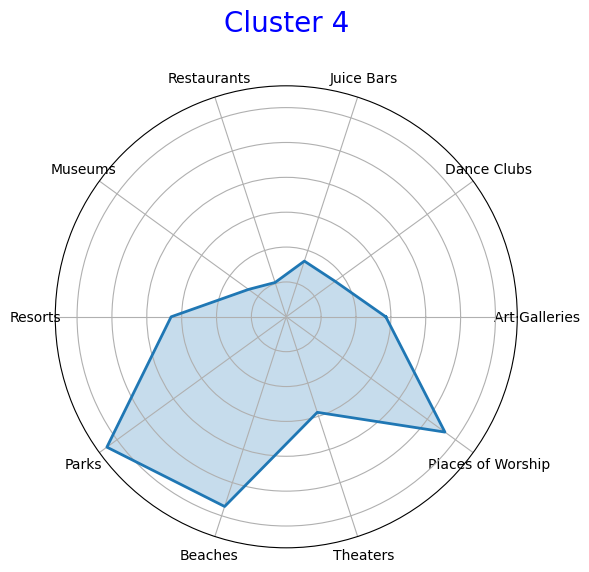

In [53]:
# Define a function to plot a radar chart
def plot_radar(data, labels, categories):
    # Calculate the angles for each category on the radar chart, ensuring they form a full circle
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    
    # Close the loop of the radar chart by appending the first data point to the end
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]
    
    # Create a polar subplot for the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Fill the area under the curve and plot the radar chart lines with appropriate styling
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data, linewidth=2)
    
    # Remove y-axis labels for cleaner visuals
    ax.set_yticklabels([])
    
    # Set the category labels around the radar chart
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    plt.title(labels, size=20, color='blue', y=1.1)
    
    # Display the radar chart
    plt.show()

# Extract the list of feature categories from the cluster summary DataFrame
categories = cluster_summary.columns.tolist()

# Iterate through each cluster and plot a radar chart for the cluster's feature values
for cluster in cluster_summary.index:
    plot_radar(cluster_summary.loc[cluster].values, f"Cluster {cluster}", categories)


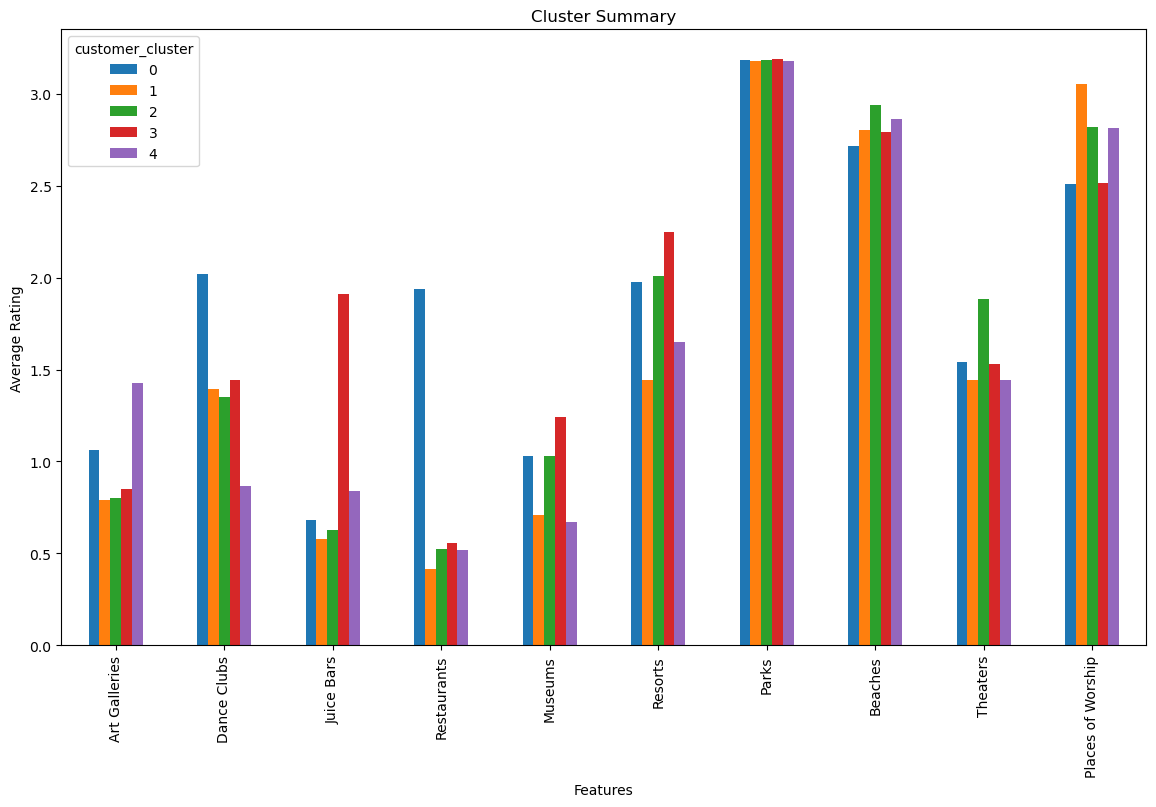

In [54]:
# Transpose the cluster summary DataFrame to plot the average feature values for each cluster as a bar chart
cluster_summary.T.plot(kind='bar', figsize=(14, 8))
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Cluster Summary')
plt.xlabel('Features')
plt.ylabel('Average Rating')
plt.show()

In [55]:
# Separate the target variable 'customer_cluster' from the feature set
# 'y' will store the customer cluster labels, and 'X' will store the features without the cluster labels
y = df_optimized['customer_cluster']
X = df_optimized.copy()
X = df_optimized.drop(columns=['customer_cluster'])

In [56]:
# Value counts for 'y'
y.value_counts()

customer_cluster
1    333
3    288
2    220
4    115
0     24
Name: count, dtype: int64

In [57]:
# Split the dataset into training and testing sets 
# The random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
# Initialize a StandardScaler to normalize the feature data
scaler = StandardScaler()

# Fit the scaler to the training data and testing data
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [59]:
# Apply the previously fitted scaler to the training data and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Initialize a RandomForestClassifier model with a fixed random state
rf_model = RandomForestClassifier(random_state=1)
# Fit the random forest model to the scaled training data
rf_model = rf_model.fit(X_train_scaled, y_train)
# Print the model's accuracy score on the training data and testing data
print(rf_model.score(X_train_scaled, y_train))
print(rf_model.score(X_test_scaled, y_test))

1.0
0.9224489795918367


In [61]:
# Use the trained Random Forest model to make predictions
rf_test_predictions = rf_model.predict(X_test_scaled)
# Display the predicted customer cluster labels
rf_test_predictions

array([1, 1, 2, 2, 1, 2, 3, 2, 1, 3, 4, 1, 2, 2, 4, 3, 1, 3, 2, 1, 4, 3,
       0, 1, 2, 2, 4, 2, 2, 2, 1, 3, 2, 1, 3, 1, 0, 3, 2, 4, 3, 1, 3, 3,
       1, 2, 1, 1, 3, 3, 3, 1, 4, 2, 2, 2, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 4, 1, 3, 4, 2, 3, 1, 3, 1, 3, 2, 1, 2, 3, 4, 1, 4, 3, 1, 3, 2,
       1, 4, 1, 2, 1, 1, 1, 2, 3, 1, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 3,
       3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 1, 4, 1, 4, 1, 1, 1, 3, 1, 0, 2, 4,
       4, 2, 3, 3, 0, 1, 1, 2, 3, 1, 1, 1, 4, 2, 2, 2, 3, 2, 1, 2, 2, 3,
       1, 1, 3, 3, 1, 2, 3, 1, 1, 1, 3, 4, 3, 1, 4, 1, 3, 3, 2, 2, 4, 1,
       3, 1, 4, 1, 1, 1, 1, 1, 3, 1, 3, 1, 0, 3, 2, 4, 2, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 4, 4, 3, 3, 2, 2, 1, 3, 2, 3, 3, 1, 2, 1, 4, 3, 1, 3,
       1, 1, 4, 1, 1, 3, 3, 1, 1, 1, 1, 2, 3, 1, 3, 4, 4, 4, 1, 4, 3, 4,
       3, 2, 3], dtype=int32)

In [62]:
# Calculate and return the accuracy score of the model's performance
accuracy_score(y_test, rf_test_predictions)

0.9224489795918367